# 1) Let's solve the TSP for bruteforce and for 5 cities

## Number of cities to be visited

In [1]:
n = 5

n =  5


## Matrix of distances between cities with random numbers

In [2]:
d = 100*rand(n);

## Fill diagonal with zeros
i = 1;
while(i<=n)
d(i,i) = 0;
i++;
end
d

d =

    0.00000   60.99677   43.63402    7.29000   49.11203
   36.94473    0.00000   63.59416   63.52289   36.81921
   91.65837   78.48206    0.00000   23.98308   65.10869
   34.87186    2.92346    7.75807    0.00000   48.10246
    3.91315   15.57324   20.32011    2.01741    0.00000



## Possible sequences of visited cities (e.g. 1,2,3,4,5 and 1,3,2,4,5)

In [3]:
p = perms([1:n]);

In [4]:
size(p)

ans =

   120     5



## Total travelled distance in each sequence of cities

In [5]:
daccs = zeros([size(p)(1),size(p)(2)+1]);

for i = 1:(size(p)(1))
    dacc = 0;
    for j = 1:(size(p)(2)-1)
        dacc += d(p(i,j),p(i,j+1));
    end
    daccs(i,:) = [p(i,:),dacc];
end

In [6]:
daccs

daccs =

     5.0000     4.0000     3.0000     2.0000     1.0000   125.2023
     5.0000     4.0000     3.0000     1.0000     2.0000   162.4306
     5.0000     4.0000     2.0000     3.0000     1.0000   160.1934
     5.0000     4.0000     2.0000     1.0000     3.0000    85.5196
     5.0000     4.0000     1.0000     3.0000     2.0000   159.0054
     5.0000     4.0000     1.0000     2.0000     3.0000   161.4802
     5.0000     3.0000     4.0000     2.0000     1.0000    84.1714
     5.0000     3.0000     4.0000     1.0000     2.0000   140.1718
     5.0000     3.0000     2.0000     4.0000     1.0000   197.1969
     5.0000     3.0000     2.0000     1.0000     4.0000   143.0369
     5.0000     3.0000     1.0000     4.0000     2.0000   122.1919
     5.0000     3.0000     1.0000     2.0000     4.0000   236.4981
     5.0000     2.0000     4.0000     3.0000     1.0000   178.5126
     5.0000     2.0000     4.0000     1.0000     3.0000   157.6020
     5.0000     2.0000     3.0000     4.0000     1.00

## Sequence of cities with the minimum total distance (optimal solution)

In [7]:
minD = min(daccs(:,6))
minS = 1

minD =  55.780
minS =  1


In [8]:
for i = 1:size(daccs)(1)
    if(daccs(i,size(daccs)(2))==minD)
        minS = i;
    end
end
daccs(minS,:);

In [9]:
fprintf('Sequence of cities: %s\n',sprintf('%d ', daccs(minS,1:size(daccs)(2)-1)))
fprintf('Minimum distance: %s\n',sprintf('%d ', daccs(minS,size(daccs)(2))))


Sequence of cities: 2 5 1 4 3 
Minimum distance: 55.7804 


# 2) Function that solve the TSP for any number of cities

In [10]:
function [n,minSeq,minDist,cpuTime] = TSP(nCities)

t=cputime;

n = nCities;
d = 100*rand(n);

## Fill diagonal with zeros
i = 1;
while(i<=n)
d(i,i) = 0;
i++;
end

p = perms([1:n]);

daccs = zeros([size(p)(1),size(p)(2)+1]);

for i = 1:(size(p)(1))
    dacc = 0;
    for j = 1:(size(p)(2)-1)
        dacc += d(p(i,j),p(i,j+1));
    end
    daccs(i,:) = [p(i,:),dacc];
end

minD = min(daccs(:,nCities+1));
minS = 1;

for i = 1:size(daccs)(1)
    if(daccs(i,size(daccs)(2))==minD)
        minS = i;
    end
end

minSeq = daccs(minS,1:(size(daccs)(2)-1));
minDist = daccs(minS,size(daccs)(2));
cpuTime = cputime-t;


end

## Function to print results

In [11]:
function printResults(n,minSeq,minDist,cpuTime)

fprintf('Number of cities: %s\n',sprintf('%d ',n))
fprintf('Sequence of cities: %s\n',sprintf('%d ',minSeq))
fprintf('Minimum distance: %s\n',sprintf('%d ', minDist))
printf('Total cpu time: %f seconds\n', cpuTime)

end

## Executing our algorithm to solve the TSP for 4,5,6,7 and 8 cities

### 4 Cities

In [12]:
[a1,a2,a3,a4] = TSP(nCities = 4); printResults(a1,a2,a3,a4)

Number of cities: 4 
Sequence of cities: 4 2 1 3 
Minimum distance: 59.131 
Total cpu time: 0.007149 seconds


### 5 Cities

In [13]:
[a1,a2,a3,a4] = TSP(nCities = 5); printResults(a1,a2,a3,a4)

Number of cities: 5 
Sequence of cities: 4 2 1 3 5 
Minimum distance: 139.323 
Total cpu time: 0.034198 seconds


### 6 Cities

In [14]:
[a1,a2,a3,a4] = TSP(nCities = 6); printResults(a1,a2,a3,a4)

Number of cities: 6 
Sequence of cities: 4 3 2 6 5 1 
Minimum distance: 73.2507 
Total cpu time: 0.206021 seconds


### 7 Cities

In [15]:
[a1,a2,a3,a4] = TSP(nCities = 7); printResults(a1,a2,a3,a4)

Number of cities: 7 
Sequence of cities: 6 2 1 3 5 4 7 
Minimum distance: 103.08 
Total cpu time: 1.117562 seconds


### 8 Cities

In [16]:
[a1,a2,a3,a4] = TSP(nCities = 8); printResults(a1,a2,a3,a4)

Number of cities: 8 
Sequence of cities: 7 1 4 8 6 2 3 5 
Minimum distance: 126.109 
Total cpu time: 9.637356 seconds


## Visualization of the growth of computational time as the number of cities increase

In [17]:
function CPUTimeAndCities = plotNCitiesCPUTime(minNCities,maxNCities)

CPUTimeAndCities = zeros(maxNCities-minNCities+1,2);

count = 1;
for i = minNCities:maxNCities;

[nCities,minSeq,minDist,cpuTime] = TSP(nCities = i);
CPUTimeAndCities(count,1) = nCities;
CPUTimeAndCities(count,2) = cpuTime;
count++;

end

end

In [18]:
CPUTimeAndCities28 = plotNCitiesCPUTime(minNCities=2,maxNCities=8)

CPUTimeAndCities28 =

   2.0000000   0.0012500
   3.0000000   0.0028280
   4.0000000   0.0070870
   5.0000000   0.0359140
   6.0000000   0.1462040
   7.0000000   1.1189360
   8.0000000   9.8600210



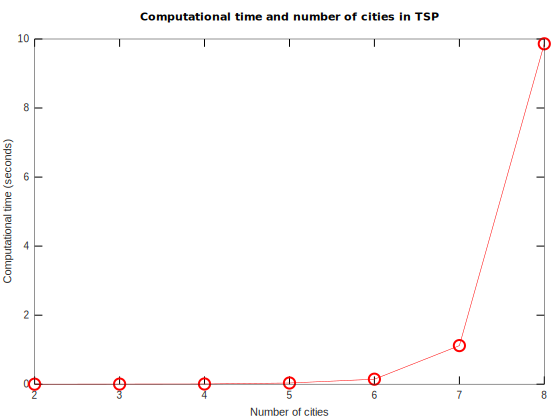

In [20]:
plot([CPUTimeAndCities28(:,1)], [CPUTimeAndCities28(:,2)], 'o-r');
title ("Computational time and number of cities in TSP");
xlabel ("Number of cities");
ylabel ("Computational time (seconds)");